# Seaborn Tutorial
For learning seaborn, I have watched a video from Derek Banas YT channel. [Here](https://www.youtube.com/watch?v=6GUZXDef2U0&t=59s) is the link.

#### Setup

In [191]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Importing datasets 
Seaborn come pre-suited with some noicé datasets which we can use in while learning.

In [192]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [193]:
crash = sns.load_dataset("car_crashes")
crash.head(6)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO


#### Distribution Plots 
NOTE: In the video, .distplot method is used. But that one is now deprecated. So I have used .displot and .histplot

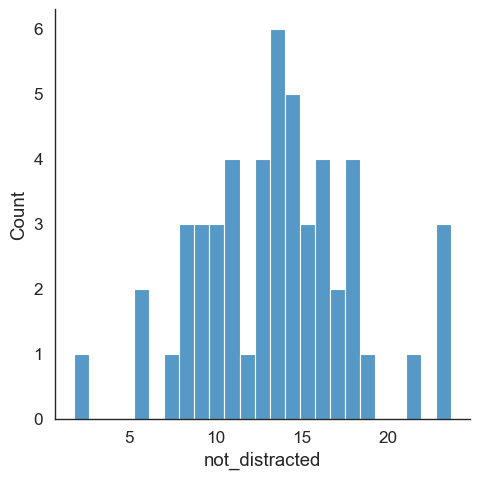

In [222]:
sns.displot(crash["not_distracted"],bins=25)
plt.show()

#### Joint Plots

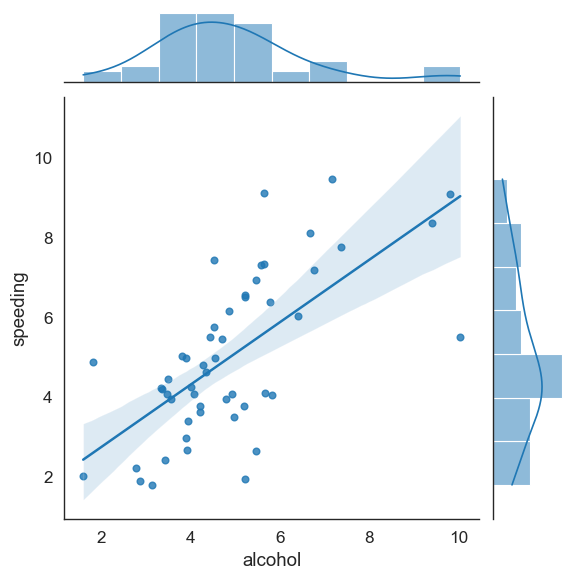

In [195]:
sns.jointplot(x = crash["alcohol"],y = crash["speeding"],kind="reg")    # kind = ["reg","hist","hex","scatter","kde", etc...]
# reg --> Linear Regression Model

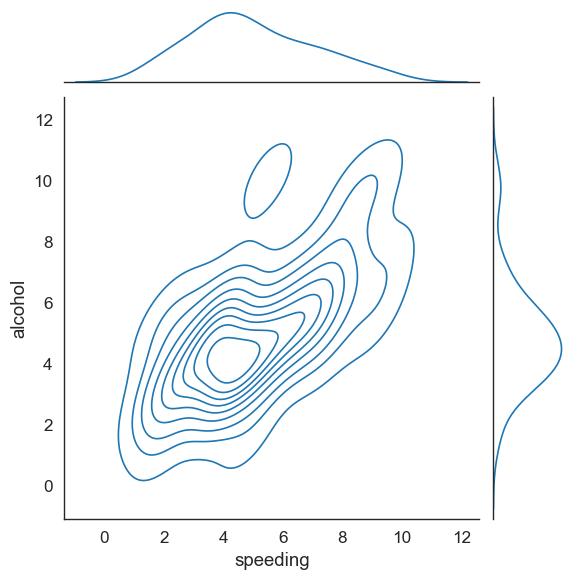

In [196]:
sns.jointplot(x=crash["speeding"],y=crash["alcohol"],kind="kde")

#### KDE Ploat
KDE --> Kernal Density Estimation

<Axes: xlabel='speeding', ylabel='Density'>

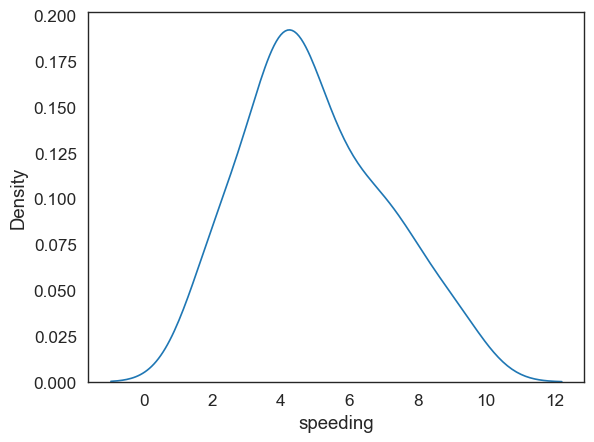

In [197]:
sns.kdeplot(crash["speeding"])

#### Pair Plots

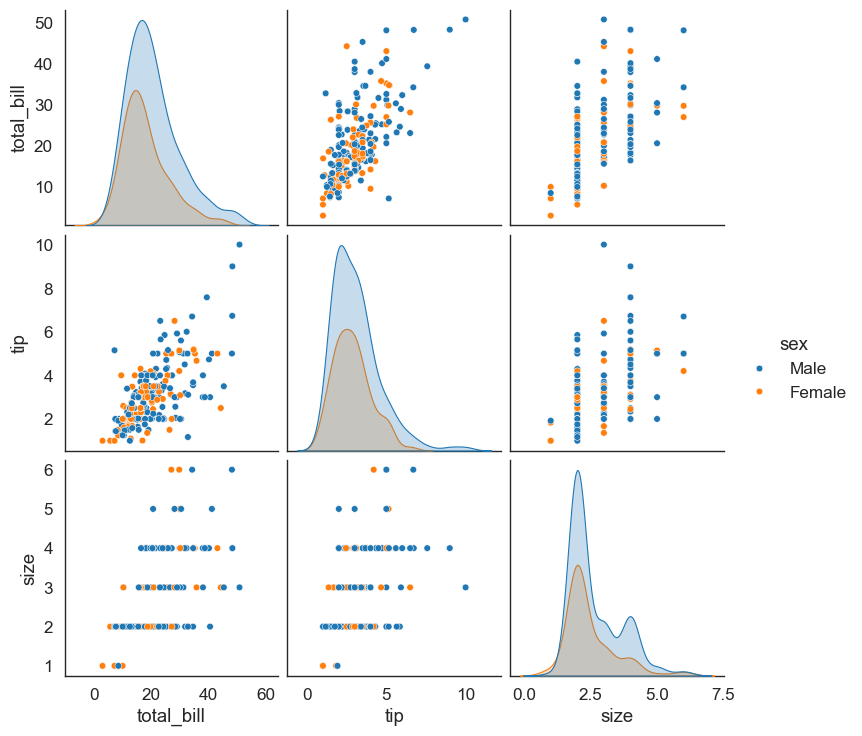

In [225]:
tip_set = sns.load_dataset("tips")
sns.pairplot(tip_set,hue="sex")
plt.show()

#### Rugplot


<Axes: xlabel='total_bill'>

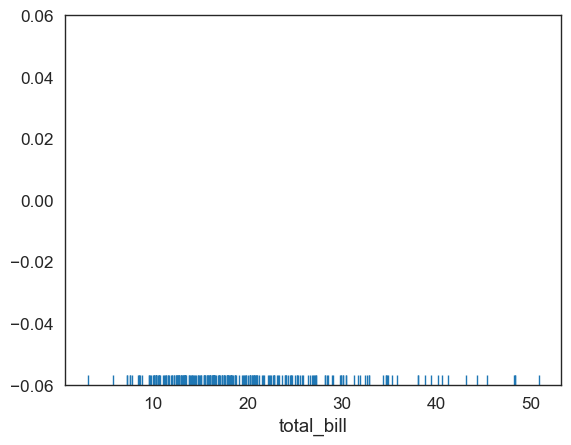

In [199]:
sns.rugplot(tip_set["total_bill"])

##### Styling

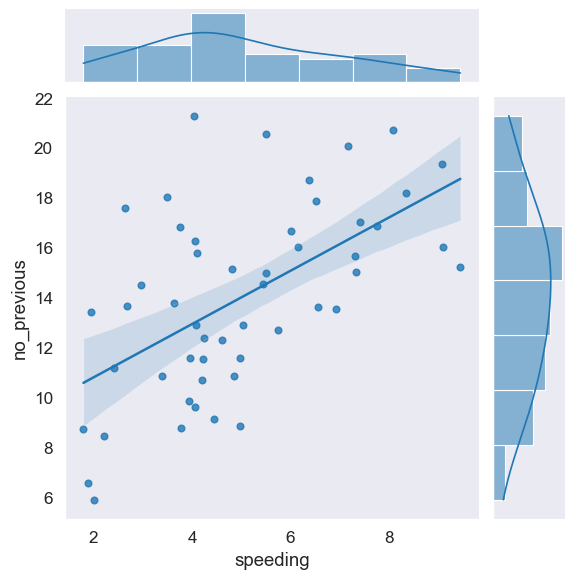

In [229]:
sns.set_style("dark")
sns.set_context("paper",font_scale=1.4)
sns.jointplot(x=crash["speeding"],y=crash["no_previous"],kind="reg")
plt.show()

### Categorical Plots

#### Countplots

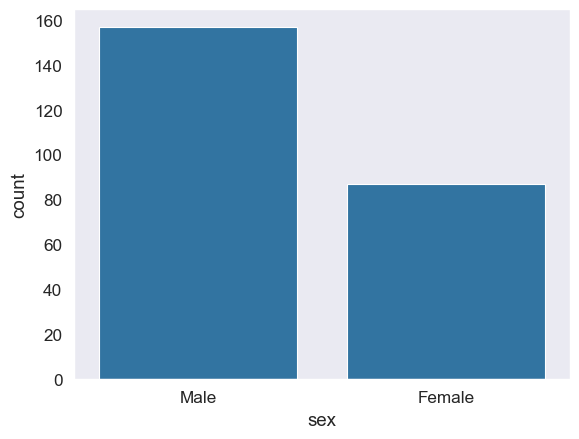

In [231]:
sns.countplot(x="sex",data=tip_set)
plt.show()

#### Barplots

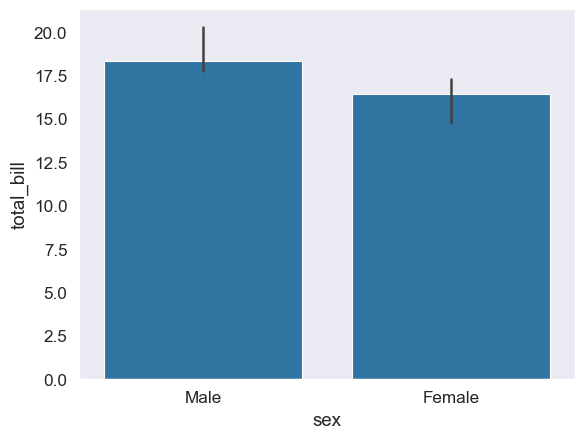

In [202]:
sns.barplot(x="sex",y="total_bill",data=tip_set,estimator=np.median)
plt.show()

#### Boxplots

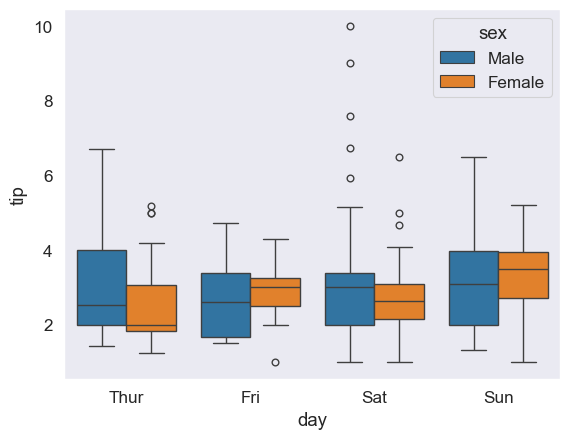

In [232]:
sns.boxplot(x=tip_set["day"],y=tip_set["tip"],hue=tip_set["sex"])
plt.show()

#### Violin Plots

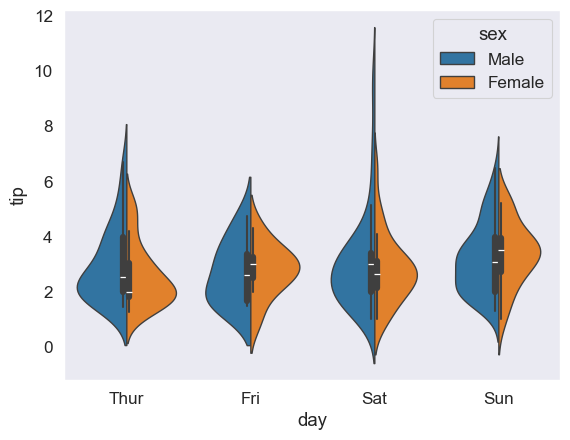

In [236]:
sns.violinplot(x=tip_set.day,y=tip_set.tip,hue=tip_set["sex"],split=True)
plt.show()

##### Strip Plots

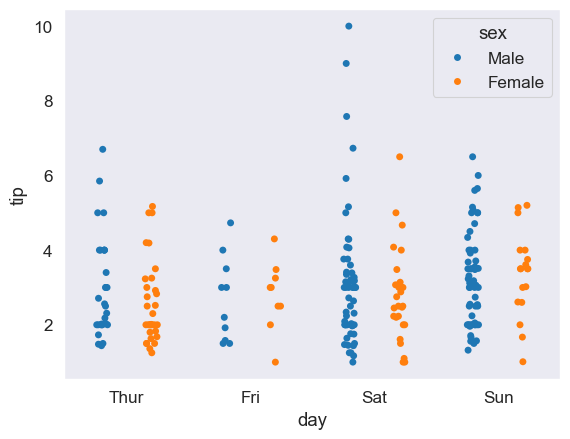

In [205]:
sns.stripplot(x=tip_set.day,y=tip_set.tip,jitter=True,hue=tip_set.sex,dodge=True)
# jitter = True --> Spreads the scattered points out so that they don't stack over each other
# dodge = True --> Seperates the scattered points when "hue = something" is set

plt.show()

#### Swarm Plots

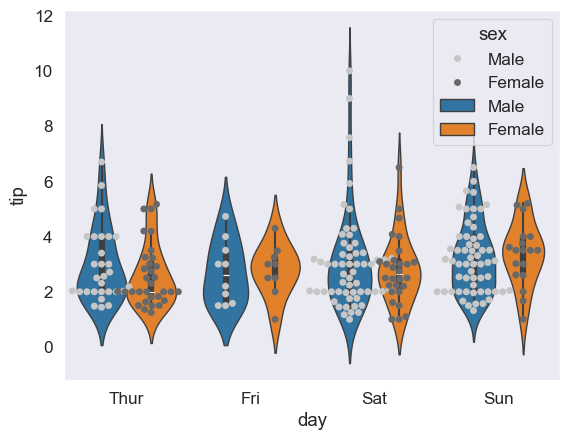

In [241]:
sns.swarmplot(x=tip_set.day,y=tip_set.tip,hue=tip_set.sex,dodge=True,palette="Greys")
sns.violinplot(x=tip_set.day,y=tip_set.tip,hue=tip_set.sex)
plt.show()

#### Paletts
Check out various available paletts [here](https://matplotlib.org/stable/users/explain/colors/colormaps.html)

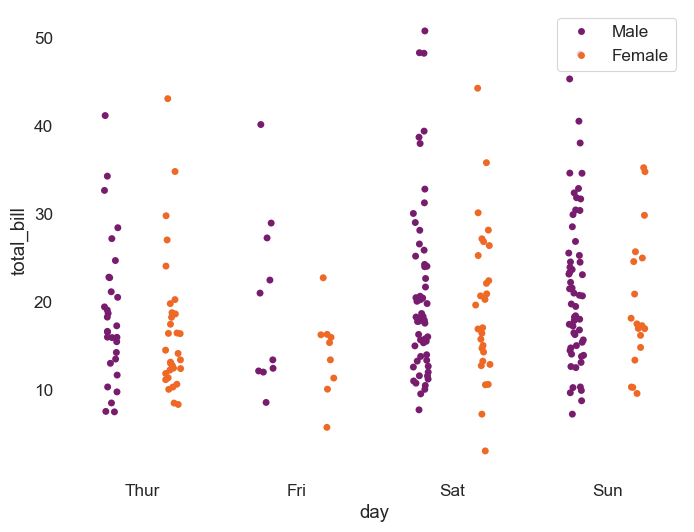

In [207]:
plt.figure(figsize=(8,6))
sns.set_style("white")
sns.stripplot(x=tip_set.day,y=tip_set.total_bill,hue=tip_set.sex,dodge=True,palette="inferno")
sns.despine(left=True,bottom=True)  # Removes borders
plt.legend(loc=1)
plt.show()

### Matrix plots

#### Heatmap

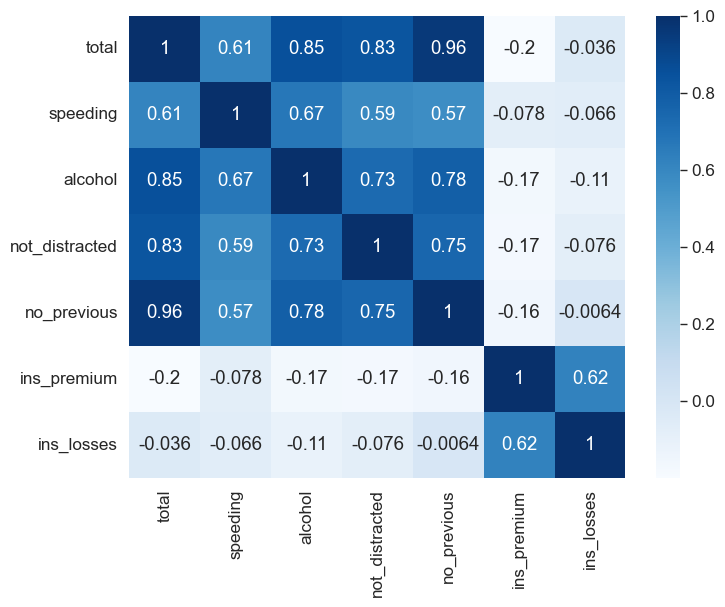

In [208]:
plt.figure(figsize=(8,6))
sns.set_style("white")
sns.set_context("paper",font_scale=1.4)

damn = crash.drop(["abbrev"],axis=1)
sns.heatmap(damn.corr(),annot=True,cmap="Blues")     # 1st way
plt.show()

# annot = True --> Displays the numbers on the heatmap
# cmap --> Sets the color map (in this notebook, it was set to magma)

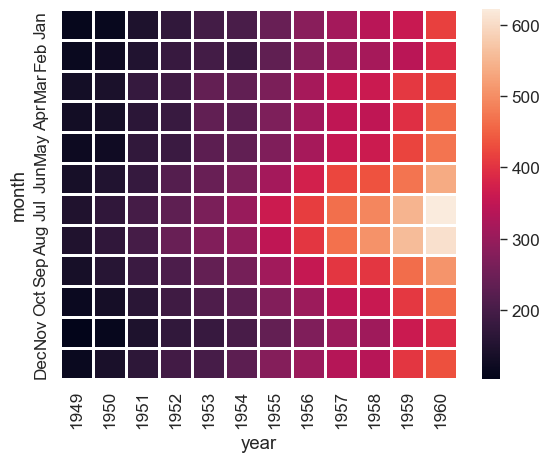

In [243]:
flights = sns.load_dataset("flights")
table = flights.pivot_table(index="month",columns="year",values="passengers",observed=True)
sns.heatmap(table,linewidths=1,linecolor="White")       # 2ND WAY
plt.show()

#### Pair Grid
It is almost the same as pairplot which we have covered before. I can't see a single difference between these. Everything we can do with pairgrid is also available with pairplot. I asked an AI to know the difference, it just said that Pair grid has an edge on more flexibility. I dont have any damn clue why they said so.

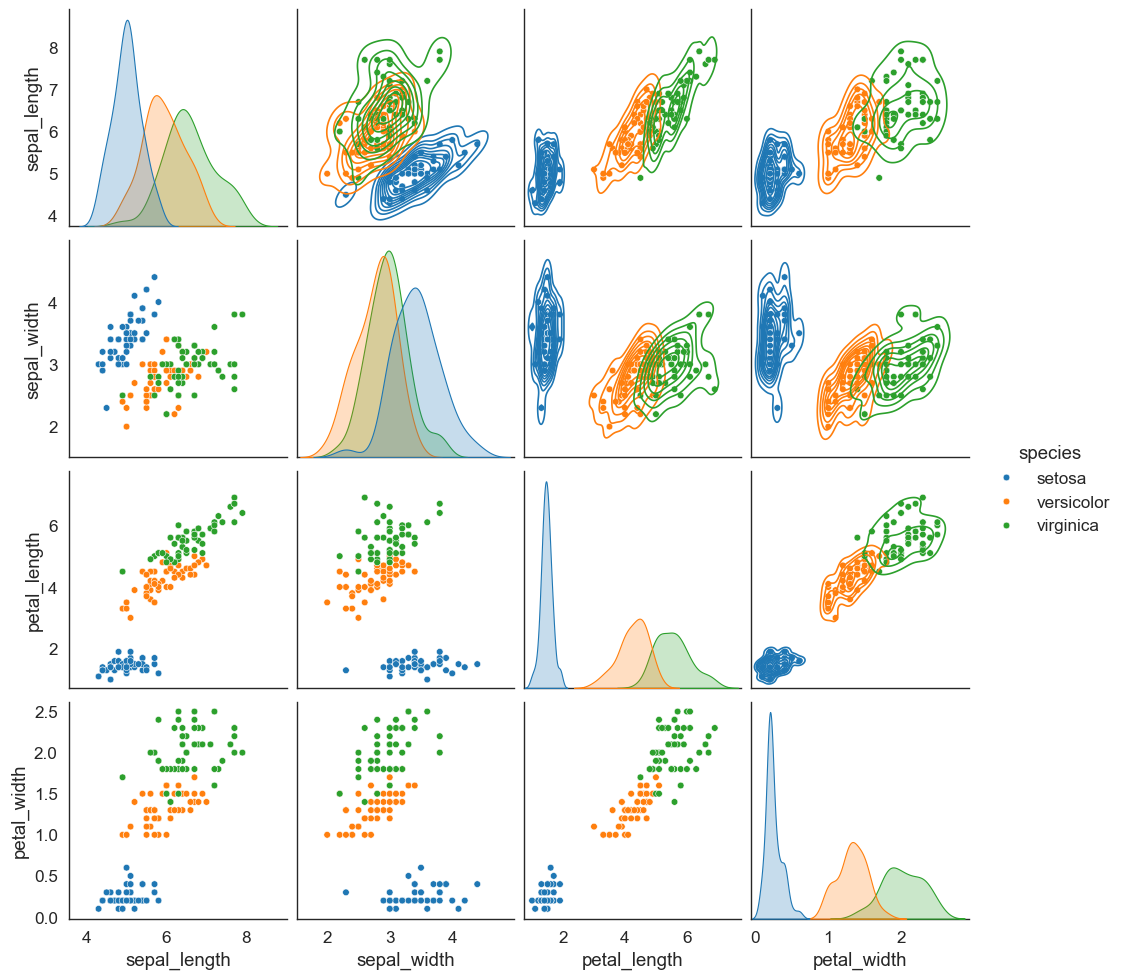

In [210]:
# With pairplot

iris = sns.load_dataset("iris")
# iris_g = sns.pairplot(iris,x_vars=["sepal_length","sepal_width"],y_vars=["petal_length","petal_width"],hue="species")
# iris_g.map(sns.kdeplot)
iris_g = sns.pairplot(iris,hue="species")
iris_g.map_upper(sns.kdeplot)
plt.show()

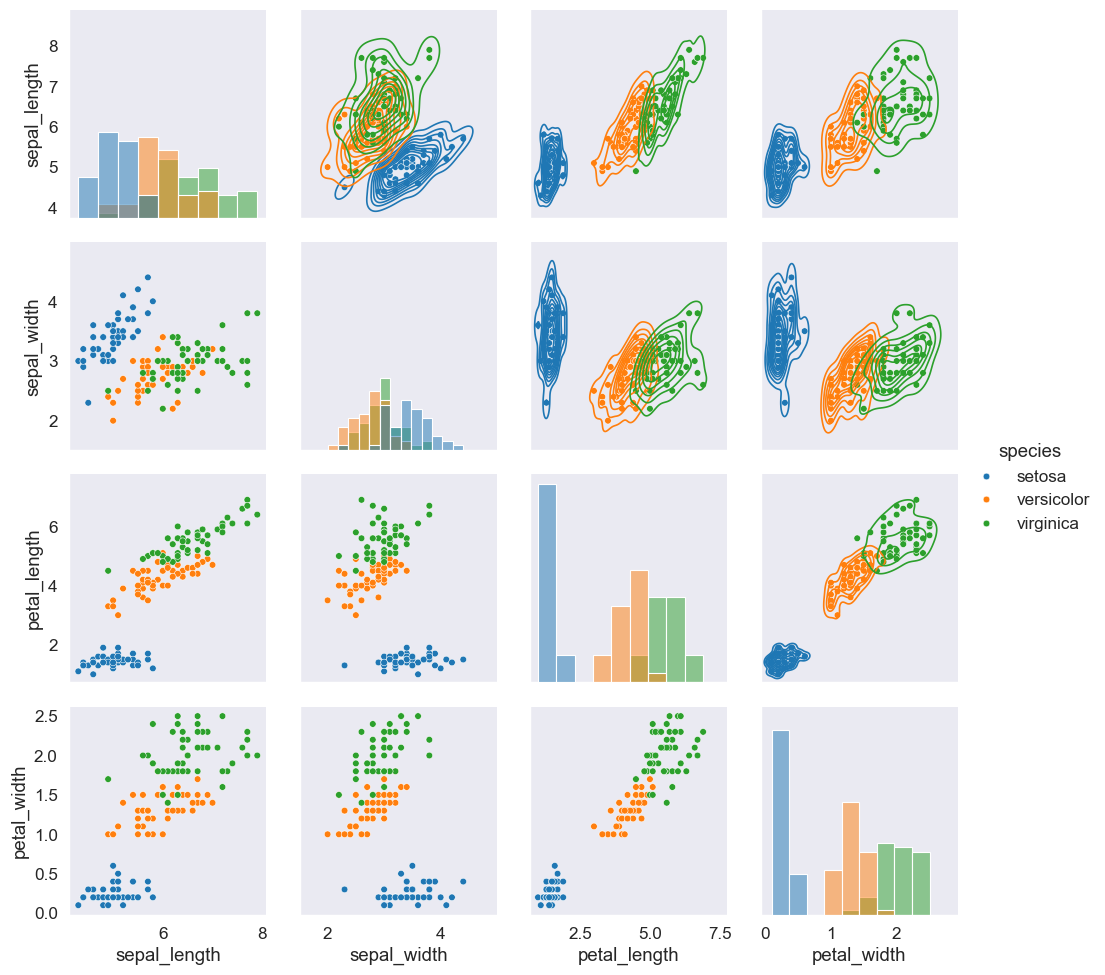

In [244]:
# With PairGrid

x = sns.PairGrid(iris,hue="species")
x.map_diag(sns.histplot)
x.map_offdiag(sns.scatterplot)
x.map_upper(sns.kdeplot)
x.add_legend()
plt.show()

#### Facet Grid

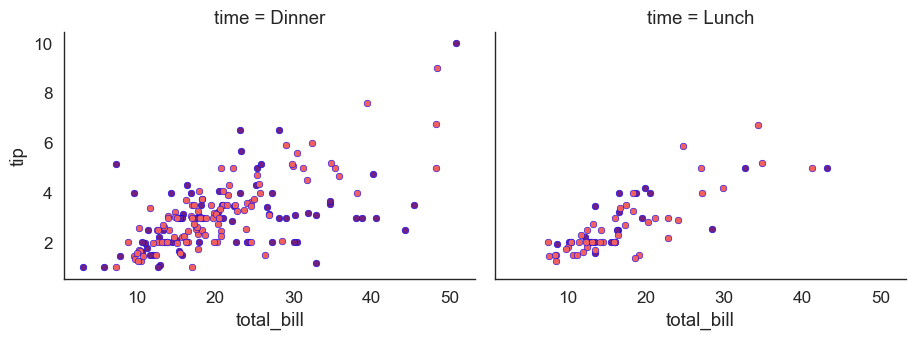

In [212]:
tip_df = sns.FacetGrid(tip_set,col="time",hue="smoker",aspect= 1.3,height=3.6,col_order=["Dinner","Lunch"],palette="magma")
tip_df.map(sns.scatterplot,"total_bill","tip",edgecolor="b")

plt.show()

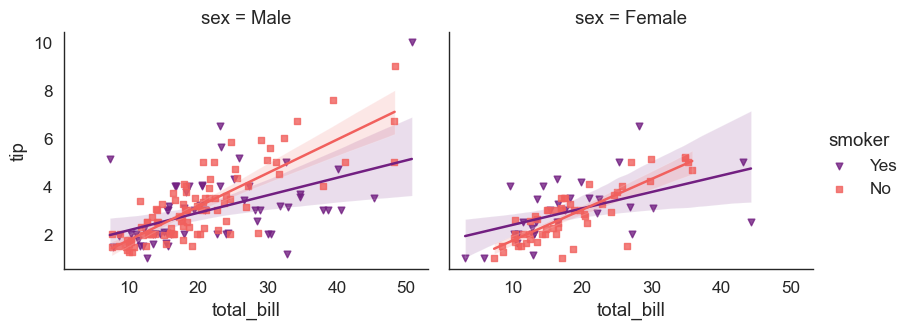

In [213]:
tip_df = sns.FacetGrid(tip_set,col="sex",hue="smoker",hue_order=["Yes","No"],hue_kws={"marker":["v",","]},palette="magma",height=3.5,aspect=1.2)
tip_df.map(sns.regplot,"total_bill","tip")
tip_df.add_legend()

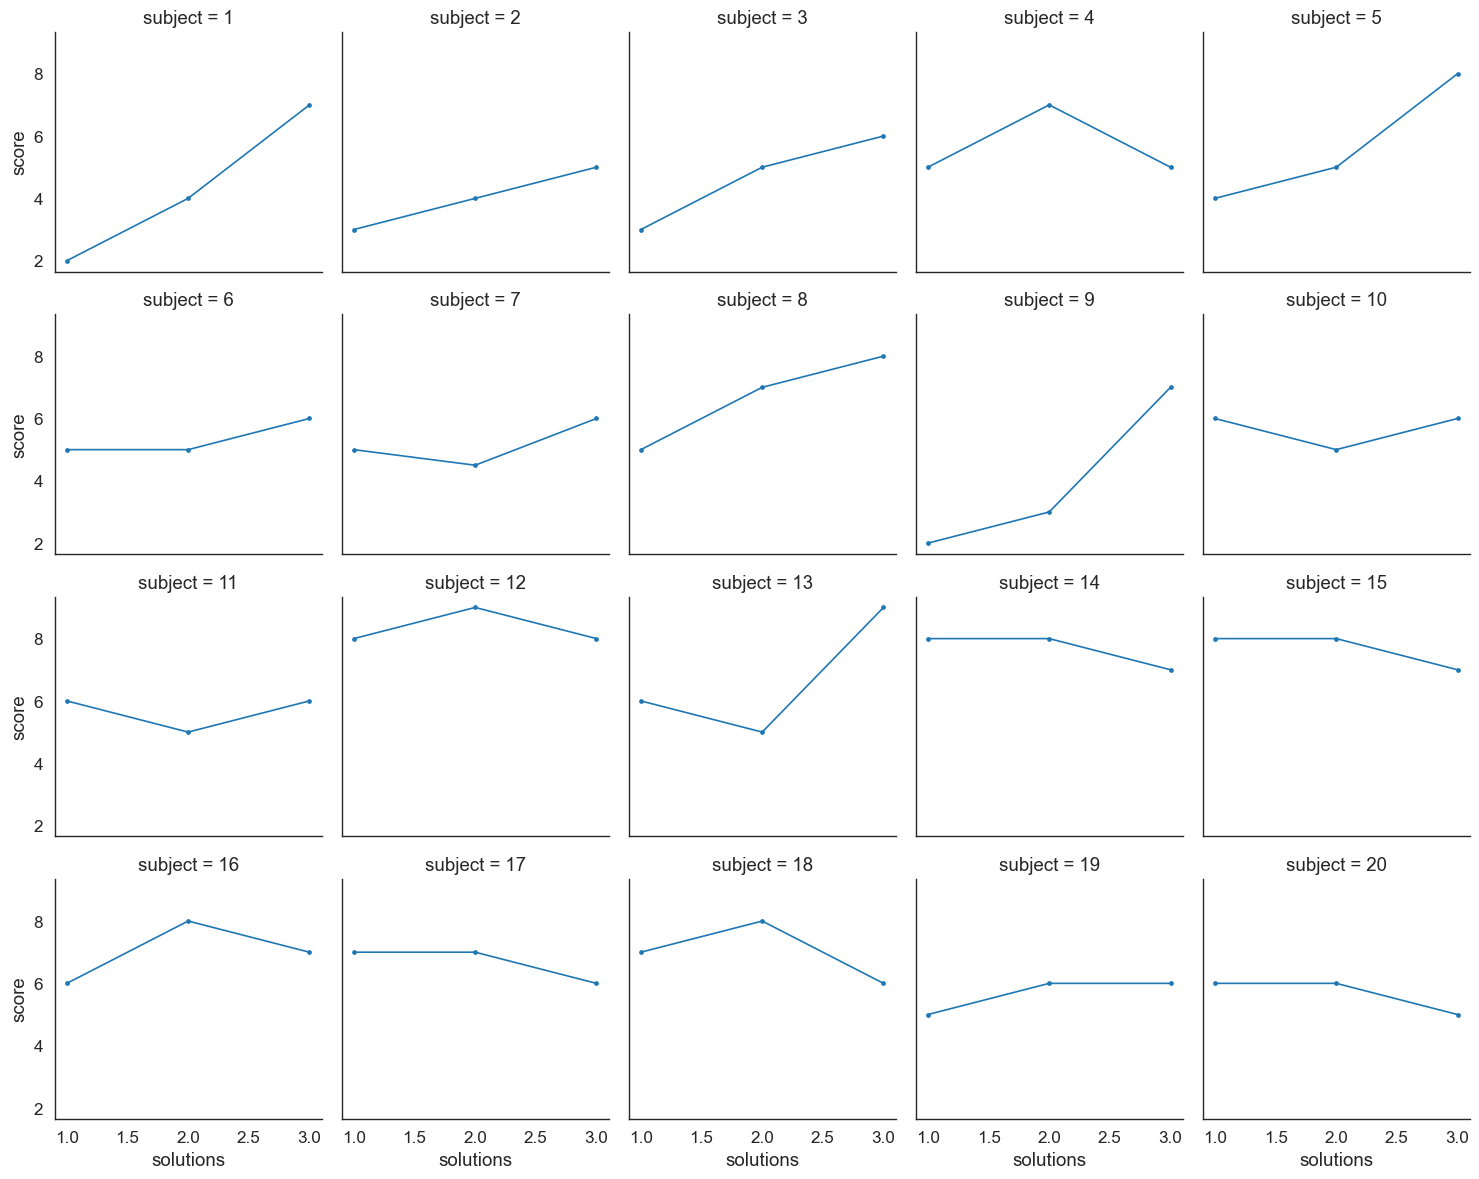

In [214]:
sch = sns.load_dataset("attention")
c = sns.FacetGrid(sch,col="subject",col_wrap=5)
c.map(plt.plot,"solutions","score",marker=".")
plt.show()

#### Regression Plot

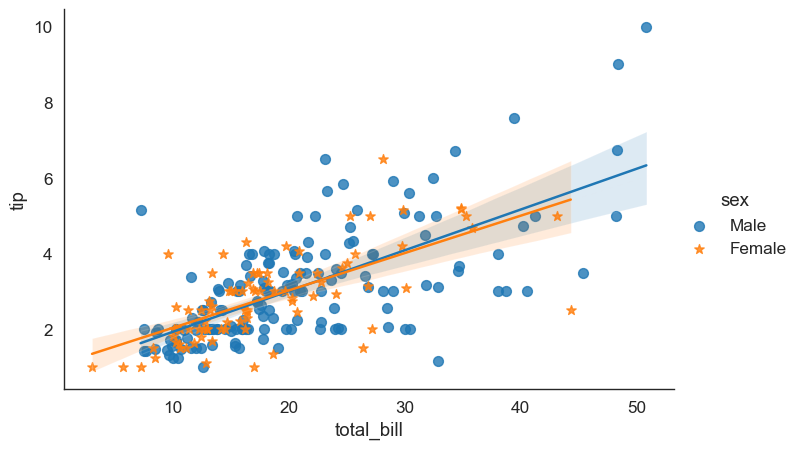

In [215]:
sns.lmplot(x="total_bill",y="tip",data=tip_set,hue="sex",markers=["o","*"],scatter_kws={"s":50},height=4.7,aspect=1.5)

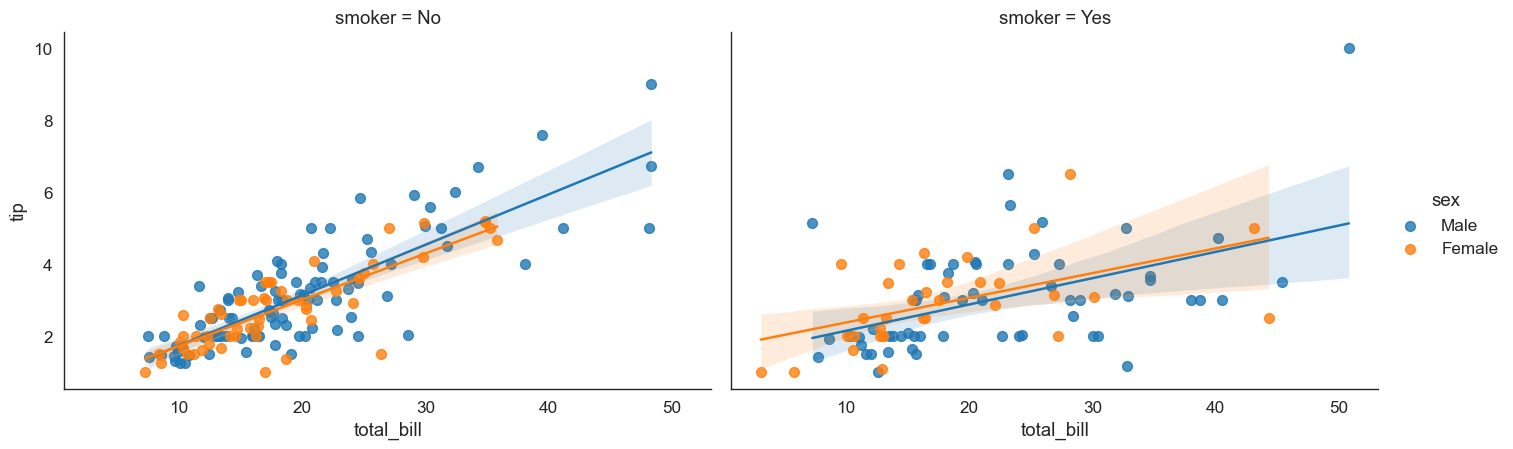

In [216]:
sns.lmplot(x="total_bill",y="tip",hue="sex",data=tip_set,scatter_kws={"s":50},height=4.7,aspect=1.5,col="smoker",col_order=["No","Yes"])